In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from LPQ import *
import os
import random

%matplotlib inline

In [2]:
classes = ['Scheherazade New', 'Marhey', 'Lemonada','IBM Plex Sans Arabic' ]
folders = [r"D:\downloads\archive\fonts-dataset\Scheherazade New",r"D:\downloads\archive\fonts-dataset\Marhey",r"D:\downloads\archive\fonts-dataset\Lemonada",r"D:\downloads\archive\fonts-dataset\IBM Plex Sans Arabic"]

# Preprocessing Step

In [3]:
def preprocess_image(image_path, desired_size=(256, 256)):
    # Read the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply median filter to remove salt and pepper noise
    denoised_img = cv2.medianBlur(img, 3)

    # Threshold the image using Otsu's method
    _, thresh_img = cv2.threshold(denoised_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Check the color of the background at all four corners
    corners = [thresh_img[0, 0], thresh_img[0, -1], thresh_img[-1, 0], thresh_img[-1, -1]]
    white_corners = np.sum(np.array(corners) == 255)

    # If the majority of the corners are white, invert the image to make the background black
    if white_corners > 2:
        thresh_img = cv2.bitwise_not(thresh_img)

    # Resize the image to the desired size
    resized_img = cv2.resize(thresh_img, desired_size, interpolation=cv2.INTER_AREA)

    return resized_img

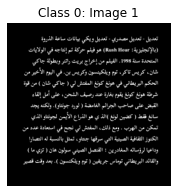

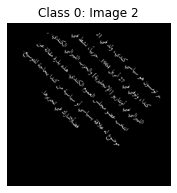

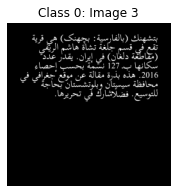

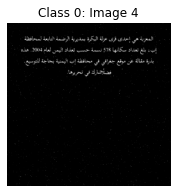

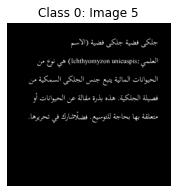

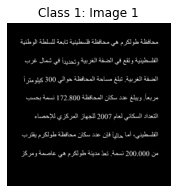

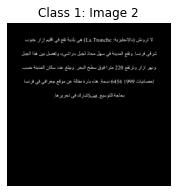

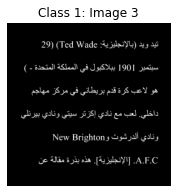

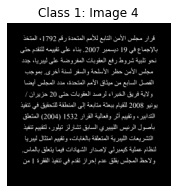

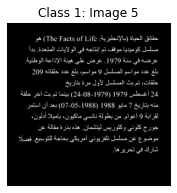

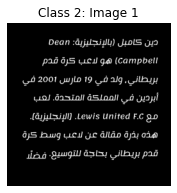

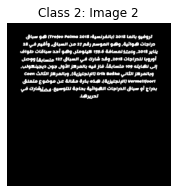

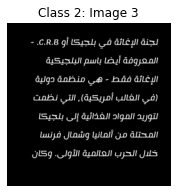

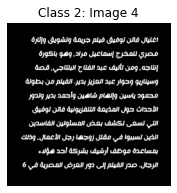

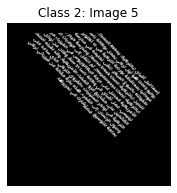

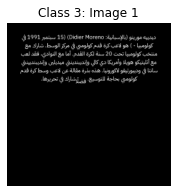

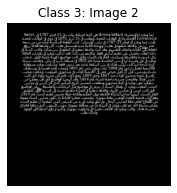

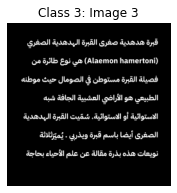

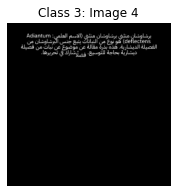

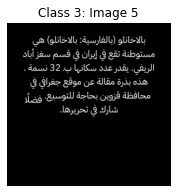

In [4]:
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.filters import threshold_otsu

for label, folder in enumerate(folders):
    files = [file for file in os.listdir(folder) if file.endswith('.jpeg')]
    # Select 5 random files
    selected_files = random.sample(files, 5)
    for i, filename in enumerate(selected_files):
        # Preprocess image
        processed_img = preprocess_image(os.path.join(folder, filename))
        # Display the processed image
        plt.figure(figsize=(3, 3))
        plt.imshow(processed_img, cmap='gray')
        plt.title(f'Class {label}: Image {i+1}')
        plt.axis('off')
        plt.show()

In [6]:
# Initialize lists to store features and labels
LPQ_Features = []
# LPQ_Features = np.load('LPQ_Features.npy')
labels = []

# Process images for each class
for label, folder in enumerate(folders):
    files = [file for file in os.listdir(folder) if file.endswith('.jpeg')]
    for i, filename in enumerate(files):
        processed_img = preprocess_image(os.path.join(folder, filename))
        
        # Extract LPQ features
        lpq_features = lpq(processed_img)
        
        # Append features and label
        LPQ_Features.append(lpq_features)
        labels.append(label)
        print(f'Class: {classes[label]}, Image No: {i}, Label: {label}')

# Convert lists to numpy arrays
LPQ_Features = np.array(LPQ_Features)
labels = np.array(labels)

np.save('LPQ_Features.npy', LPQ_Features)


Class: Scheherazade New, Image No: 0, Label: 0
Class: Scheherazade New, Image No: 1, Label: 0
Class: Scheherazade New, Image No: 2, Label: 0
Class: Scheherazade New, Image No: 3, Label: 0
Class: Scheherazade New, Image No: 4, Label: 0
Class: Scheherazade New, Image No: 5, Label: 0
Class: Scheherazade New, Image No: 6, Label: 0
Class: Scheherazade New, Image No: 7, Label: 0
Class: Scheherazade New, Image No: 8, Label: 0
Class: Scheherazade New, Image No: 9, Label: 0
Class: Scheherazade New, Image No: 10, Label: 0
Class: Scheherazade New, Image No: 11, Label: 0
Class: Scheherazade New, Image No: 12, Label: 0
Class: Scheherazade New, Image No: 13, Label: 0
Class: Scheherazade New, Image No: 14, Label: 0
Class: Scheherazade New, Image No: 15, Label: 0
Class: Scheherazade New, Image No: 16, Label: 0
Class: Scheherazade New, Image No: 17, Label: 0
Class: Scheherazade New, Image No: 18, Label: 0
Class: Scheherazade New, Image No: 19, Label: 0
Class: Scheherazade New, Image No: 20, Label: 0
Cl

In [7]:
from sklearn.model_selection import train_test_split

# Split the shuffled data and labels into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(LPQ_Features, labels, test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3200, 256)
(3200,)
(800, 256)
(800,)


In [8]:
%load_ext autoreload
%autoreload 2
from classifiers_manager import ClassifiersManager
classifiers_manager = ClassifiersManager()
classifiers_manager.train_all_classifiers(x_train,y_train)

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [13]:
classifiers_manager.load_all_classifiers()
classifiers_manager.test_all_classifiers(x_test,y_test,classes)
classifiers_manager.print_metrics()

SVM
                      precision    recall  f1-score   support

    Scheherazade New       0.98      0.96      0.97       181
              Marhey       0.96      0.96      0.96       201
            Lemonada       1.00      0.98      0.99       220
IBM Plex Sans Arabic       0.97      1.00      0.98       198

            accuracy                           0.98       800
           macro avg       0.98      0.98      0.98       800
        weighted avg       0.98      0.98      0.98       800

KNN
                      precision    recall  f1-score   support

    Scheherazade New       0.65      0.85      0.74       181
              Marhey       0.75      0.73      0.74       201
            Lemonada       0.95      0.83      0.89       220
IBM Plex Sans Arabic       0.86      0.78      0.81       198

            accuracy                           0.79       800
           macro avg       0.80      0.79      0.79       800
        weighted avg       0.81      0.79      0.80      